# 확률적 경사 하강법 (Stochastic Gradient Descent, SGD)

**확률적 경사 하강법(SGD)**은 경사 하강법의 한 변형으로, 전체 데이터셋이 아닌 **랜덤하게 선택된 단 하나의 데이터 샘플**에 대한 그래디언트를 계산하여 파라미터를 업데이트하는 최적화 알고리즘임.

전체 데이터를 사용하는 배치(Batch) 경사 하강법은 데이터가 매우 클 경우 한 번의 업데이트에 많은 계산이 필요하지만, SGD는 단 하나의 샘플만 사용하므로 업데이트 속도가 매우 빠름. 이러한 특성 때문에 대용량 데이터셋의 학습에 효율적임.

### 📐 수학적 배경

SGD의 파라미터 업데이트 규칙은 기본 경사 하강법과 유사하지만, 비용 함수 $J$와 그래디언트 $\nabla J$가 전체 데이터가 아닌 **하나의 샘플** $(x^{(i)}, y^{(i)})$에 대해서만 계산된다는 점이 다름.

$$ \theta_{\text{new}} := \theta_{\text{old}} - \eta \nabla J(\theta; x^{(i)}, y^{(i)}) $$

* $\theta$: 업데이트할 모델 파라미터 (가중치 $W$, 편향 $b$)
* $\eta$: 학습률(Learning Rate)
* $\nabla J(\theta; x^{(i)}, y^{(i)})$: 단일 샘플 $(x^{(i)}, y^{(i)})$에 대한 비용 함수의 그래디언트

#### 예시: 선형 회귀의 SGD 그래디언트
단일 샘플에 대한 비용 함수 $J = \frac{1}{2}((Wx^{(i)} + b) - y^{(i)})^2$ (미분 단순화를 위해 1/2 사용)에 대해, 각 파라미터의 그래디언트는 다음과 같음.

$$ \frac{\partial J}{\partial W} = ((Wx^{(i)} + b) - y^{(i)})x^{(i)} $$
$$ \frac{\partial J}{\partial b} = (Wx^{(i)} + b) - y^{(i)} $$

### 셋업 (Setup)
계산 및 시각화를 위한 라이브러리 임포트.

In [4]:
# !pip install numpy matplotlib
import numpy as np
import matplotlib.pyplot as plt

### 예제 데이터 준비 (Data Preparation)
SGD의 동작을 살펴보기 위해 비교적 많은 수의 데이터를 생성함. 목표는 $y \approx 3X + 4$ 관계를 찾아내는 것.

X shape: (100, 1)
y shape: (100, 1)


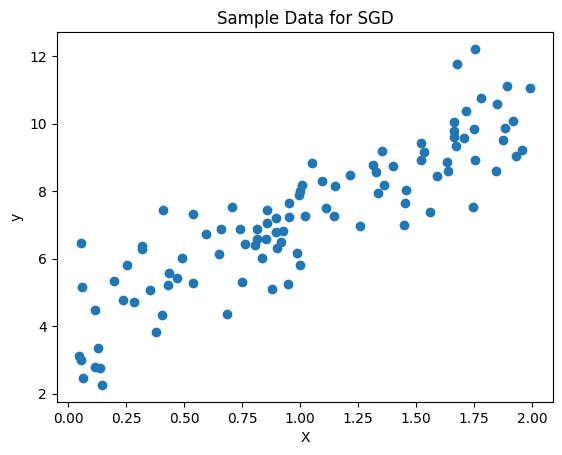

In [5]:
# 100개의 데이터 포인트 생성
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1) # y = 4 + 3X + noise

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

# 데이터 시각화
plt.scatter(X, y)
plt.title("Sample Data for SGD")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

### 핵심 로직 구현 (Code Implementation)
SGD 알고리즘을 구현하여 선형 회귀 모델의 가중치(W)와 편향(b)을 학습시킴.

In [6]:
# 1. 파라미터 초기화
W = np.random.randn() # 가중치
b = np.random.randn() # 편향

# 2. 하이퍼파라미터 설정
learning_rate = 0.01
epochs = 50
n = len(X)

cost_history = []

# 3. SGD 학습 시작
for epoch in range(epochs):
    # 매 에포크마다 데이터 순서를 섞어줌 (확률적 특성 강화)
    shuffled_indices = np.random.permutation(n)
    X_shuffled = X[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    
    # 3-1. 각 데이터 샘플에 대해 개별적으로 업데이트 진행
    for i in range(n):
        xi = X_shuffled[i]
        yi = y_shuffled[i]
        
        # 예측값 계산
        y_pred = W * xi + b
        
        # 그래디언트 계산 (스칼라 값으로 변환)
        grad_W = np.sum((y_pred - yi) * xi)
        grad_b = np.sum(y_pred - yi)
        
        # 파라미터 업데이트
        W = W - learning_rate * grad_W
        b = b - learning_rate * grad_b
        
    # 3-2. 매 에포크 종료 시 전체 데이터에 대한 비용 계산 및 기록
    total_cost = np.mean((W * X + b - y)**2)
    cost_history.append(total_cost)
    
    # 학습 과정 출력 (5번마다)
    if (epoch + 1) % 5 == 0:
        print(f"Epoch {epoch+1:2d} | Cost: {total_cost:.4f} | W: {W:.4f} | b: {b:.4f}")

Epoch  5 | Cost: 0.9993 | W: 3.2414 | b: 3.9102
Epoch 10 | Cost: 1.0054 | W: 3.2248 | b: 3.8737
Epoch 15 | Cost: 0.9982 | W: 3.2707 | b: 3.8919
Epoch 20 | Cost: 0.9979 | W: 3.2909 | b: 3.8911
Epoch 25 | Cost: 1.0109 | W: 3.2282 | b: 3.8400
Epoch 30 | Cost: 0.9982 | W: 3.2820 | b: 3.8772
Epoch 35 | Cost: 1.0038 | W: 3.3294 | b: 3.9183
Epoch 40 | Cost: 0.9979 | W: 3.2904 | b: 3.8792
Epoch 45 | Cost: 0.9980 | W: 3.2862 | b: 3.8824
Epoch 50 | Cost: 1.0040 | W: 3.2453 | b: 3.8571


### 📊 결과 확인 및 시각화 (Results & Visualization)

#### 비용 함수 변화 시각화
SGD의 비용 감소는 배치 경사 하강법처럼 매끄럽지 않고 변동성이 큰(noisy) 특징을 보임.

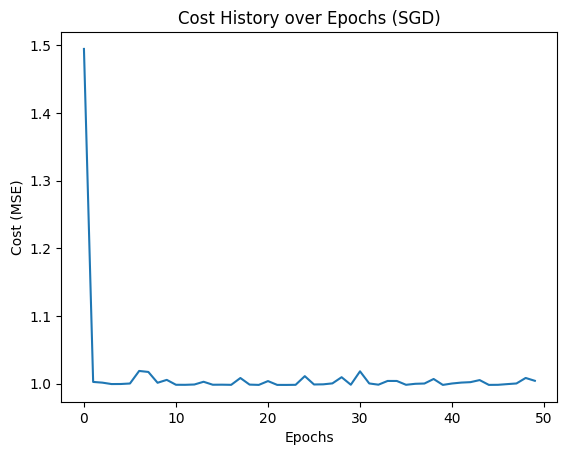

In [7]:
plt.plot(cost_history)
plt.title("Cost History over Epochs (SGD)")
plt.xlabel("Epochs")
plt.ylabel("Cost (MSE)")
plt.show()

#### 최종 회귀선 시각화
학습된 W와 b를 사용하여 데이터에 가장 적합한 회귀선을 시각화.


최종 학습 결과 -> W: 3.2453, b: 3.8571 (정답 근사치: W=3, b=4)


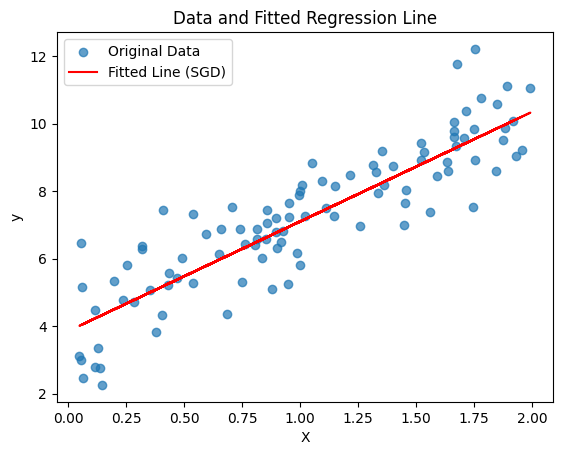

In [8]:
print(f"\n최종 학습 결과 -> W: {W:.4f}, b: {b:.4f} (정답 근사치: W=3, b=4)")

plt.scatter(X, y, label='Original Data', alpha=0.7)
plt.plot(X, W * X + b, color='red', label='Fitted Line (SGD)')
plt.title("Data and Fitted Regression Line")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

### 고려사항 (Considerations)

* **불안정한 비용 감소**: SGD는 하나의 샘플만 보기 때문에 그래디언트 방향의 변동이 매우 큼. 이로 인해 비용 함수 값이 매끄럽게 감소하지 않고 지그재그 형태로 움직임. 이러한 '노이즈'가 오히려 지역 최솟값(local minimum)을 탈출하는 데 도움이 되기도 함.

* **학습률 스케줄링(Learning Rate Scheduling)**: 학습이 진행됨에 따라 학습률을 점차 줄이는 기법이 효과적임. 처음에는 큰 학습률로 최적점에 빠르게 다가가고, 최적점 근처에서는 학습률을 줄여 미세 조정을 통해 안정적으로 수렴하도록 유도할 수 있음.

* **미니배치 경사 하강법 (Mini-batch GD)**: 실제 딥러닝에서는 순수한 SGD보다 **미니배치 경사 하강법**이 더 널리 사용됨. 이는 한 번에 1개의 샘플이 아닌, 작은 그룹(미니배치, 예: 32개, 64개)의 샘플을 사용하여 파라미터를 업데이트하는 방식임. 미니배치 방식은 SGD의 빠른 업데이트 속도와 배치 방식의 안정적인 그래디언트 추정의 장점을 절충한 형태임.

### 최종 요약 (Conclusion)

확률적 경사 하강법(SGD)은 대용량 데이터셋 학습을 위한 매우 효율적인 최적화 방법임. 매 업데이트마다 단 하나의 데이터 샘플을 사용함으로써 계산 복잡도를 크게 줄이고 빠른 학습을 가능하게 함.

이 노트북에서는 SGD의 원리를 이해하고 직접 구현해보았음. 비용 함수의 변화가 불안정하지만 결국 전역 최적점 근처로 수렴하는 과정을 통해 SGD의 동작 방식과 특성을 확인함. SGD는 현대 딥러닝에서 널리 쓰이는 미니배치 경사 하강법의 근간이 되는 중요한 개념임.